In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import re
import spacy

In [7]:
# Load spaCy model
nlp = spacy.load("en_core_web_md")

# Movie plot text
plot = """
The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth. In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12. Her older sister Katniss volunteers to take her place. Peeta Mellark, a baker's son who once gave Katniss bread when she was starving, is the other District 12 tribute. Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy. He warns them about the "Career" tributes who train intensively at special academies and almost always win. During a TV interview with Caesar Flickerman, Peeta unexpectedly reveals his love for Katniss. She is outraged, believing it to be a ploy to gain audience support, as "sponsors" may provide in-Games gifts of food, medicine, and tools. However, she discovers Peeta meant what he said. The televised Games begin with half of the tributes killed in the first few minutes; Katniss barely survives ignoring Haymitch's advice to run away from the melee over the tempting supplies and weapons strewn in front of a structure called the Cornucopia. Peeta forms an uneasy alliance with the four Careers. They later find Katniss and corner her up a tree. Rue, hiding in a nearby tree, draws her attention to a poisonous tracker jacker nest hanging from a branch. Katniss drops it on her sleeping besiegers. They all scatter, except for Glimmer, who is killed by the insects. Hallucinating due to tracker jacker venom, Katniss is warned to run away by Peeta. Rue cares for Katniss for a couple of days until she recovers. Meanwhile, the alliance has gathered all the supplies into a pile. Katniss has Rue draw them off, then destroys the stockpile by setting off the mines planted around it. Furious, Cato kills the boy assigned to guard it. As Katniss runs from the scene, she hears Rue calling her name. She finds Rue trapped and releases her. Marvel, a tribute from District 1, throws a spear at Katniss, but she dodges the spear, causing it to stab Rue in the stomach instead. Katniss shoots him dead with an arrow. She then comforts the dying Rue with a song. Afterward, she gathers and arranges flowers around Rue's body. When this is televised, it sparks a riot in Rue's District 11. President Snow summons Seneca Crane, the Gamemaker, to express his displeasure at the way the Games are turning out. Since Katniss and Peeta have been presented to the public as "star-crossed lovers", Haymitch is able to convince Crane to make a rule change to avoid inciting further riots. It is announced that tributes from the same district can win as a pair. Upon hearing this, Katniss searches for Peeta and finds him with an infected sword wound in the leg. She portrays herself as deeply in love with him and gains a sponsor's gift of soup. An announcer proclaims a feast, where the thing each survivor needs most will be provided. Peeta begs her not to risk getting him medicine. Katniss promises not to go, but after he falls asleep, she heads to the feast. Clove ambushes her and pins her down. As Clove gloats, Thresh, the other District 11 tribute, kills Clove after overhearing her tormenting Katniss about killing Rue. He spares Katniss "just this time...for Rue". The medicine works, keeping Peeta mobile. Foxface, the girl from District 5, dies from eating nightlock berries she stole from Peeta; neither knew they are highly poisonous. Crane changes the time of day in the arena to late at night and unleashes a pack of hound-like creatures to speed things up. They kill Thresh and force Katniss and Peeta to flee to the roof of the Cornucopia, where they encounter Cato. After a battle, Katniss wounds Cato with an arrow and Peeta hurls him to the creatures below. Katniss shoots Cato to spare him a prolonged death. With Peeta and Katniss apparently victorious, the rule change allowing two winners is suddenly revoked. Peeta tells Katniss to shoot him. Instead, she gives him half of the nightlock. However, before they can commit suicide, they are hastily proclaimed the victors of the 74th Hunger Games. Haymitch warns Katniss that she has made powerful enemies after her display of defiance. She and Peeta return to District 12, while Crane is locked in a room with a bowl of nightlock berries, and President Snow considers the situation.
"""

# Process the movie plot text with spaCy
doc = nlp(plot)

#make a function that takes in a sentence and returns the subject, a list of adjectifs of the subject, the verb, the object and a list of adjectives of the object
def get_subject_object(sent):
    for token in sent:
        if token.pos_ == "VERB" :  # Root verb (action)
            action = token.text
            subject = [child.text for child in token.children if child.dep_ == "nsubj"]
            object_ = [child.text for child in token.children if child.dep_ == "dobj"]
            if subject:
                actions.append((subject[0], action, object_[0] if object_ else None))
                return subject[0], action, object_[0] if object_ else None
            

for sent in doc.sents:
    print(get_subject_object(sent))


('nation', 'consists', None)
('district', 'provide', 'boy')
('tributes', 'fight', None)
None
('sister', 'take', 'place')
('who', 'gave', 'bread')
None
('He', 'warns', 'them')
('Peeta', 'reveals', 'love')
('sponsors', 'provide', 'gifts')
('she', 'discovers', None)
('Games', 'begin', None)
('Peeta', 'forms', 'alliance')
('They', 'find', 'Katniss')
('Rue', 'draws', 'attention')
('Katniss', 'drops', 'it')
('They', 'scatter', None)
None
('Rue', 'cares', None)
('alliance', 'gathered', 'supplies')
('Rue', 'draw', 'them')
('Cato', 'kills', 'boy')
('Katniss', 'runs', None)
('She', 'finds', None)
('Marvel', 'throws', 'spear')
('Katniss', 'shoots', 'him')
('She', 'comforts', 'Rue')
('she', 'gathers', None)
('it', 'sparks', 'riot')
('Snow', 'summons', 'Crane')
('change', 'avoid', None)
('tributes', 'win', None)
('Katniss', 'searches', None)
('She', 'portrays', 'herself')
('announcer', 'proclaims', 'feast')
('Peeta', 'begs', 'her')
('Katniss', 'promises', None)
('Clove', 'ambushes', 'her')
('Thresh

In [8]:
# function that given a personn and sentences returns the sentences where the person is cited
def get_sentences_with_person(person, doc):
    sentences = []
    for sent in doc.sents:
        if person in sent.text:
            sentences.append(sent.text)
    return sentences

# test function for every personn in doc.ents whose .label_ is PERSON

#function that returns a list of unique characters
def get_characters(doc):
    characters = []
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            characters.append(ent.text)
    return list(set(characters))


characters = get_characters(doc)
for ent in characters:
    print(ent, get_sentences_with_person(ent, doc))

Rue ['Rue, hiding in a nearby tree, draws her attention to a poisonous tracker jacker nest hanging from a branch.', 'Rue cares for Katniss for a couple of days until she recovers.', 'Katniss has Rue draw them off, then destroys the stockpile by setting off the mines planted around it.', 'As Katniss runs from the scene, she hears Rue calling her name.', 'She finds Rue trapped and releases her.', 'Marvel, a tribute from District 1, throws a spear at Katniss, but she dodges the spear, causing it to stab Rue in the stomach instead.', 'She then comforts the dying Rue with a song.', "Afterward, she gathers and arranges flowers around Rue's body.", "When this is televised, it sparks a riot in Rue's District 11.", 'As Clove gloats, Thresh, the other District 11 tribute, kills Clove after overhearing her tormenting Katniss about killing Rue.', 'He spares Katniss "just this time...for Rue".']
Haymitch ['Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, pas

In [9]:
def merge_similar_names(characters):
    updated_strings = []

    for i, current_str in enumerate(characters):
        is_substring = any(current_str in other_str for j, other_str in enumerate(characters) if i != j)
        
        if not is_substring:
            updated_strings.append(current_str)

    return updated_strings

# Example usage
characters = merge_similar_names(characters)
print("Merged Characters:", characters)


Merged Characters: ['Rue', 'Snow', 'Peeta Mellark', 'Caesar Flickerman', 'Seneca Crane', 'Haymitch Abernathy', 'eating nightlock', 'Katniss', 'Cato', 'Primrose Everdeen']


In [5]:
# Accessing noun chunks
for chunk in doc.noun_chunks:
    print(f"Noun Chunk: {chunk.text}")

Noun Chunk: 
The nation
Noun Chunk: Panem
Noun Chunk: a wealthy Capitol
Noun Chunk: twelve poorer districts
Noun Chunk: punishment
Noun Chunk: a past rebellion
Noun Chunk: each district
Noun Chunk: a boy
Noun Chunk: girl
Noun Chunk: the ages
Noun Chunk: lottery
Noun Chunk: the annual Hunger Games
Noun Chunk: The tributes
Noun Chunk: the death
Noun Chunk: an arena
Noun Chunk: the sole survivor
Noun Chunk: fame
Noun Chunk: wealth
Noun Chunk: her first Reaping
Noun Chunk: 12-year-old Primrose Everdeen
Noun Chunk: District
Noun Chunk: Her older sister
Noun Chunk: Katniss volunteers
Noun Chunk: her place
Noun Chunk: Peeta Mellark
Noun Chunk: a baker's son
Noun Chunk: who
Noun Chunk: Katniss bread
Noun Chunk: she
Noun Chunk: the other District 12 tribute
Noun Chunk: Katniss
Noun Chunk: Peeta
Noun Chunk: the Capitol
Noun Chunk: their frequently drunk mentor
Noun Chunk: victor Haymitch Abernathy
Noun Chunk: He
Noun Chunk: them
Noun Chunk: the "Career" tributes
Noun Chunk: who
Noun Chunk: speci

In [22]:
import networkx as nx


# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
G.add_nodes_from(characters)
G.add_edges_from(actions)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', font_size=8, edge_color='gray', connectionstyle="arc3,rad=0.1")

# Add edge labels
edge_labels = {(source, target): data["label"] for source, target, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the plot
plt.show()

ValueError: dictionary update sequence element #0 has length 1; 2 is required

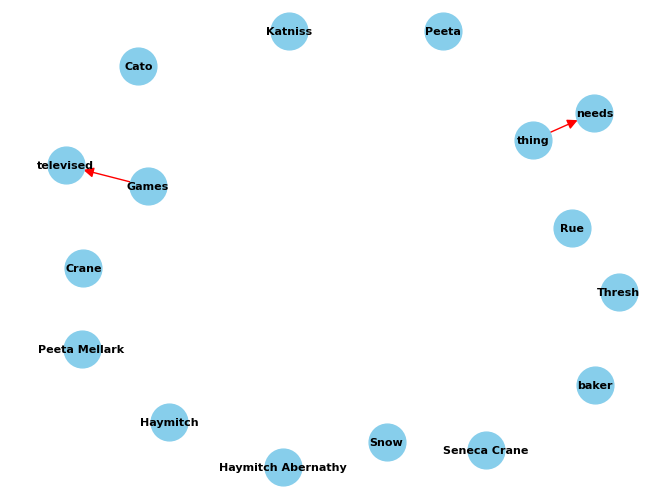

In [6]:

# Your plot summary
plot = """
The nation of Panem consists of a wealthy Capitol and twelve poorer districts. As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games. The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth. In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12. Her older sister Katniss volunteers to take her place. Peeta Mellark, a baker's son who once gave Katniss bread when she was starving, is the other District 12 tribute. Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy. He warns them about the "Career" tributes who train intensively at special academies and almost always win. During a TV interview with Caesar Flickerman, Peeta unexpectedly reveals his love for Katniss. She is outraged, believing it to be a ploy to gain audience support, as "sponsors" may provide in-Games gifts of food, medicine, and tools. However, she discovers Peeta meant what he said. The televised Games begin with half of the tributes killed in the first few minutes; Katniss barely survives ignoring Haymitch's advice to run away from the melee over the tempting supplies and weapons strewn in front of a structure called the Cornucopia. Peeta forms an uneasy alliance with the four Careers. They later find Katniss and corner her up a tree. Rue, hiding in a nearby tree, draws her attention to a poisonous tracker jacker nest hanging from a branch. Katniss drops it on her sleeping besiegers. They all scatter, except for Glimmer, who is killed by the insects. Hallucinating due to tracker jacker venom, Katniss is warned to run away by Peeta. Rue cares for Katniss for a couple of days until she recovers. Meanwhile, the alliance has gathered all the supplies into a pile. Katniss has Rue draw them off, then destroys the stockpile by setting off the mines planted around it. Furious, Cato kills the boy assigned to guard it. As Katniss runs from the scene, she hears Rue calling her name. She finds Rue trapped and releases her. Marvel, a tribute from District 1, throws a spear at Katniss, but she dodges the spear, causing it to stab Rue in the stomach instead. Katniss shoots him dead with an arrow. She then comforts the dying Rue with a song. Afterward, she gathers and arranges flowers around Rue's body. When this is televised, it sparks a riot in Rue's District 11. President Snow summons Seneca Crane, the Gamemaker, to express his displeasure at the way the Games are turning out. Since Katniss and Peeta have been presented to the public as "star-crossed lovers", Haymitch is able to convince Crane to make a rule change to avoid inciting further riots. It is announced that tributes from the same district can win as a pair. Upon hearing this, Katniss searches for Peeta and finds him with an infected sword wound in the leg. She portrays herself as deeply in love with him and gains a sponsor's gift of soup. An announcer proclaims a feast, where the thing each survivor needs most will be provided. Peeta begs her not to risk getting him medicine. Katniss promises not to go, but after he falls asleep, she heads to the feast. Clove ambushes her and pins her down. As Clove gloats, Thresh, the other District 11 tribute, kills Clove after overhearing her tormenting Katniss about killing Rue. He spares Katniss "just this time...for Rue". The medicine works, keeping Peeta mobile. Foxface, the girl from District 5, dies from eating nightlock berries she stole from Peeta; neither knew they are highly poisonous. Crane changes the time of day in the arena to late at night and unleashes a pack of hound-like creatures to speed things up. They kill Thresh and force Katniss and Peeta to flee to the roof of the Cornucopia, where they encounter Cato. After a battle, Katniss wounds Cato with an arrow and Peeta hurls him to the creatures below. Katniss shoots Cato to spare him a prolonged death. With Peeta and Katniss apparently victorious, the rule change allowing two winners is suddenly revoked. Peeta tells Katniss to shoot him. Instead, she gives him half of the nightlock. However, before they can commit suicide, they are hastily proclaimed the victors of the 74th Hunger Games. Haymitch warns Katniss that she has made powerful enemies after her display of defiance. She and Peeta return to District 12, while Crane is locked in a room with a bowl of nightlock berries, and President Snow considers the situation.
"""

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the plot summary with spaCy
doc = nlp(plot)

# Create a directed graph
G = nx.DiGraph()

# Add nodes for entities (persons, organizations, etc.)
for ent in doc.ents:
    if (ent.label_=="PERSON"):
        G.add_node(ent.text, label=ent.label_)

# Add edges based on verbs and their relationships
for sent in doc.sents:
    for token in sent:
        if token.pos_ == "VERB":
            # Subject of the verb (outgoing edge)
            if token.head.dep_ in ('nsubj', 'nsubjpass'):
                subj = token.head.text
                G.add_edge(subj, token.text, relation="subject")

            # Object of the verb (incoming edge)
            if token.head.dep_ == 'attr' and token.head.head == token:
                obj = token.head.text
                G.add_edge(obj, token.text, relation="object")

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8, edge_color='red', font_color='black', arrowsize=15)

# Show the plot
plt.show()


In [3]:
for sentence in doc.sents:
    print(sentence)


The nation of Panem consists of a wealthy Capitol and twelve poorer districts.
As punishment for a past rebellion, each district must provide a boy and girl between the ages of 12 and 18 selected by lottery for the annual Hunger Games.
The tributes must fight to the death in an arena; the sole survivor is rewarded with fame and wealth.
In her first Reaping, 12-year-old Primrose Everdeen is chosen from District 12.
Her older sister Katniss volunteers to take her place.
Peeta Mellark, a baker's son who once gave Katniss bread when she was starving, is the other District 12 tribute.
Katniss and Peeta are taken to the Capitol, accompanied by their frequently drunk mentor, past victor Haymitch Abernathy.
He warns them about the "Career" tributes who train intensively at special academies and almost always win.
During a TV interview with Caesar Flickerman, Peeta unexpectedly reveals his love for Katniss.
She is outraged, believing it to be a ploy to gain audience support, as "sponsors" may 

In [15]:
for token in doc:
    if token.text != token.lemma_:
        print(token.text, token.lemma_)

The the
consists consist
poorer poor
districts district
As as
ages age
selected select
The the
tributes tribute
is be
rewarded reward
In in
is be
chosen choose
Her her
older old
volunteers volunteer
gave give
was be
starving starve
is be
are be
taken take
accompanied accompany
He he
warns warn
them they
Career career
tributes tribute
academies academy
During during
TV tv
reveals reveal
She she
is be
believing believe
sponsors sponsor
gifts gift
tools tool
However however
discovers discover
meant mean
said say
The the
televised televise
tributes tribute
killed kill
minutes minute
survives survive
ignoring ignore
tempting tempt
supplies supply
weapons weapon
strewn strew
called call
Peeta peeta
forms form
Careers career
They they
her she
Rue rue
hiding hide
draws draw
hanging hang
drops drop
besiegers besieger
They they
is be
killed kill
insects insect
Hallucinating hallucinating
is be
warned warn
Rue rue
cares care
days day
recovers recover
Meanwhile meanwhile
has have
gathered gather
s

In [5]:
for ent in doc.ents:
    print(ent.text, ent.label_)

Panem ORG
Capitol ORG
twelve CARDINAL
between the ages of 12 and 18 DATE
annual DATE
Hunger Games EVENT
12-year-old DATE
Primrose Everdeen ORG
District 12 FAC
Katniss PERSON
Peeta Mellark PERSON
baker PERSON
Katniss ORG
District 12 DATE
Katniss PERSON
Peeta PERSON
Capitol FAC
Haymitch Abernathy PERSON
Career WORK_OF_ART
Caesar Flickerman ORG
Peeta ORG
Katniss PERSON
Peeta PERSON
half CARDINAL
the first few minutes TIME
Katniss ORG
Haymitch PERSON
Cornucopia GPE
four CARDINAL
Katniss ORG
Katniss ORG
Glimmer ORG
Katniss ORG
Peeta ORG
Katniss ORG
a couple of days DATE
Katniss ORG
Cato ORG
Katniss ORG
Rue PERSON
District 1 DATE
Katniss ORG
Rue PERSON
Rue WORK_OF_ART
Rue ORG
Rue's FAC
District 11 DATE
Snow PERSON
Seneca Crane PERSON
Katniss PERSON
Peeta PERSON
Haymitch PERSON
Katniss ORG
Peeta PRODUCT
Katniss ORG
Thresh GPE
District 11 LOC
Katniss ORG
Rue WORK_OF_ART
Rue WORK_OF_ART
Peeta ORG
Foxface ORG
District 5 DATE
Peeta ORG
late at night TIME
Thresh PERSON
Cornucopia GPE
Cato PERSON
K

In [5]:
for token in doc:
    print(token.text, token.pos_, token.dep_)


 SPACE dep
The DET det
nation NOUN nsubj
of ADP prep
Panem PROPN pobj
consists VERB ROOT
of ADP prep
a DET det
wealthy ADJ amod
Capitol PROPN pobj
and CCONJ cc
twelve NUM nummod
poorer ADJ amod
districts NOUN conj
. PUNCT punct
As ADP prep
punishment NOUN pobj
for ADP prep
a DET det
past ADJ amod
rebellion NOUN pobj
, PUNCT punct
each DET det
district NOUN nsubj
must AUX aux
provide VERB ROOT
a DET det
boy NOUN dobj
and CCONJ cc
girl NOUN conj
between ADP prep
the DET det
ages NOUN pobj
of ADP prep
12 NUM pobj
and CCONJ cc
18 NUM conj
selected VERB acl
by ADP agent
lottery NOUN pobj
for ADP prep
the DET det
annual ADJ amod
Hunger PROPN compound
Games PROPN pobj
. PUNCT punct
The DET det
tributes NOUN nsubj
must AUX aux
fight VERB ccomp
to ADP prep
the DET det
death NOUN pobj
in ADP prep
an DET det
arena NOUN pobj
; PUNCT punct
the DET det
sole ADJ amod
survivor NOUN nsubjpass
is AUX auxpass
rewarded VERB ROOT
with ADP prep
fame NOUN pobj
and CCONJ cc
wealth NOUN conj
. PUNCT punct
In 